# Goal

In this notebook we are going to use the GeoPy API in order to obtain more useful location related information from the coordinates. This technique is called "Reverse Geocoding".

# Import Libraries and Set Options

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from daftpy.daftfeanalysis import (location_dict, location_dataframe, location_engineering, 
                                   geonames_dict)

from daftpy.daftfeanalysis import missing_values, eircode_homogenize, add_location

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

# Load Data

In [3]:
sale = pd.read_csv('data_available/sale_cleaned.csv', sep=',', parse_dates=['entered_renewed', 'scraping_date'])
sale.shape

(7662, 19)

In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   daft_id          7662 non-null   int64         
 1   url              7662 non-null   object        
 2   name             7662 non-null   object        
 3   price            7662 non-null   float64       
 4   sale_type        7662 non-null   object        
 5   floor_area       7662 non-null   int64         
 6   psr              7646 non-null   float64       
 7   ber              7467 non-null   object        
 8   entered_renewed  7662 non-null   datetime64[ns]
 9   views            7662 non-null   float64       
 10  type_house       7175 non-null   object        
 11  type             7662 non-null   object        
 12  scraping_date    7662 non-null   datetime64[ns]
 13  description      7661 non-null   object        
 14  latitude         7662 non-null   float64

# Check Missing Values

In [5]:
# Check missing values in absolute and relative terms
missing_values(sale)

,Absolute,Relative
daft_id,0,0.000000
url,0,0.000000
name,0,0.000000
price,0,0.000000
sale_type,0,0.000000
floor_area,0,0.000000
psr,16,0.002088
ber,195,0.025450
entered_renewed,0,0.000000
views,0,0.000000


If you pay attention to the `ber` column you will note that now there are 195 missing values instead 192 as in the other notebook. That is because there was 3 ads which have `NA` in that column. We can understand `NA` value as a lack of information so the the `pd.read_csv` function has fixed that for us.

# Reverse Geocoding

We do reverse geocoding with GeoPy and Nominatim geolocator. The `location_engineering` function uses two more functions, one to creating a dictionary with the extracted information and another one to add that dictionary to the DataFrame.

In [5]:
sale = location_engineering(df=sale)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
Shape before adding: (7662, 19)
Shape after adding: (7662, 32)
----------
Difference: 13 columns


It took a long time so I decided save the resulted dataframe into a csv file.

In [6]:
sale.to_csv('data_available/sale_post_reverse_geocoding.csv', 
            sep=',', index=False)

--------------

# Load Post Reverse Geocoding Data

In [3]:
sale = pd.read_csv('data_available/sale_post_reverse_geocoding.csv', sep=',')
sale.shape

(7662, 32)

In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   daft_id          7662 non-null   int64  
 1   url              7662 non-null   object 
 2   name             7662 non-null   object 
 3   price            7662 non-null   float64
 4   sale_type        7662 non-null   object 
 5   floor_area       7662 non-null   int64  
 6   psr              7646 non-null   float64
 7   ber              7467 non-null   object 
 8   entered_renewed  7662 non-null   object 
 9   views            7662 non-null   float64
 10  type_house       7175 non-null   object 
 11  type             7662 non-null   object 
 12  scraping_date    7662 non-null   object 
 13  description      7661 non-null   object 
 14  latitude         7662 non-null   float64
 15  longitude        7662 non-null   float64
 16  bedroom          7662 non-null   int64  
 17  bathroom      

# Check Missing Values

In [5]:
# Check missing values in absolute and relative terms
missing_values(sale)

,Absolute,Relative
daft_id,0,0.000000
url,0,0.000000
name,0,0.000000
price,0,0.000000
sale_type,0,0.000000
floor_area,0,0.000000
psr,16,0.002088
ber,195,0.025450
entered_renewed,0,0.000000
views,0,0.000000


As we can see there are a lot of new missing values in the data recently added. We are going to deal with them in a minut but first let's see if any UK ad managed to skip our data cleaning task when we cleaned the coordinates. IMPROVE CLEANED IN COORDINATES -> AS MAPS

In [6]:
sale.country.value_counts()

Éire / Ireland    7661
United Kingdom       1
Name: country, dtype: int64

There it is. Let's quickly drop it.

In [7]:
sale.drop(sale[sale.country == 'United Kingdom'].index, inplace=True)
sale.country.value_counts()

Éire / Ireland    7661
Name: country, dtype: int64

# Dealing With New Missing Values

Let's isolate the variables we are interested in to work eaisier.

In [8]:
location_features = ['url', 
                     'latitude', 
                     'longitude', 
                     'country_code', 
                     'country', 
                     'postcode', 
                     'state_district', 
                     'county', 
                     'municipality', 
                     'city', 
                     'town', 
                     'city_district', 
                     'locality', 
                     'road', 
                     'house_number']

missing_values(sale[location_features])

,Absolute,Relative
url,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
country_code,0,0.000000
country,0,0.000000
postcode,1208,0.157682
state_district,394,0.051429
county,695,0.090719
municipality,6390,0.834095
city,5645,0.736849


## Eircode

The postcode is called "Eircode" in Ireland. It consist of a "Routing Key" and a "Unique Identifier". The routing key is associated with the city or town and is the three first characters from the Eircode.

![](imgs/eircode.png)

There is a 73% and a 85% of missing values in `city` and `town` columns respectively. However, there is only a 15% of missing values in the `postcode` column. We can use the `postcode` column to find out the `town` values.

Let's check how many missing values there are in both columns at the same time.

In [9]:
#
sale.loc[sale[['city', 'town']].isna().all(axis=1)].shape

(4511, 32)

And missing values in the three columns at the same time.

In [10]:
sale.loc[sale[['city', 'town', 'postcode']].isna().all(axis=1)].shape

(1073, 32)

### Scraping Geonames Page

We can scrape [this page](http://www.geonames.org/postalcode-search.html?q=&country=IE) to obtain the information aboyt the town. That page show the eircode's routing key and its respectively town or city. As we have most of the eircodes, we can match them with the city or town names.

We will use the `geonames_dict` function to scrape the page and create a dictionary with the info. Also we can create a DataFrame with that dictionary.

In [11]:
# Make a DataFrame with the dictionary obtained from `geonames_dict` function
geonames_df = pd.DataFrame(geonames_dict())
print(geonames_df.shape)
geonames_df.head(3)

(139, 4)


,place,code,admin1,place_coordinates
0,Ballyboughal,A41,Leinster,53.52/-6.267
1,Garristown,A42,Leinster,53.566/-6.386
2,Oldtown,A45,Leinster,53.525/-6.316


### Homogenize Postcode Column

Now we need to check the `postcode` column in order to make sure that is has the eircode's routing key. 

Let's dig a little deeper into `postcode` column.

In [12]:
sale['postcode'].str.len().value_counts(dropna=False)

8.0     5682
NaN     1208
7.0      603
9.0       47
1.0       30
3.0       23
2.0       21
10.0      17
6.0       12
12.0       9
11.0       4
4.0        3
13.0       2
Name: postcode, dtype: int64

We should check each different case and wrangling and cleaning each one to try to homogenize them.

#### Eircode length = 8

Eircode equals to eigth is what we want as adding the blank space an eircode has eigth charactrs, three of the routing key and other four of the unique identifier.

In [13]:
sale.loc[sale.postcode.str.len() == 8, ['postcode']].sample(3)

,postcode
224,T12 H1XY
7499,T23 V2T0
117,A82 F866


#### Eircode length = 7

We could add a blank space between the routing key and the unique identifier.

In [14]:
sale.loc[sale.postcode.str.len() == 7, ['postcode']].sample(3)

,postcode
5223,X91HD52
6485,C15P297
2923,D06F304


#### Eircode length = 9

We will handle all this cases in the homogenize function, giving most of them `np.nan`.

In [15]:
sale.loc[sale.postcode.str.len() == 9, ['postcode']].sample(3)

,postcode
2942,DUBLIN 22
5211,DUBLIN 18
5942,DUBLIN 18


#### Eircode length = 1

Those ads with a single number as a postcode belong to Dublin. It is reasonable to think that those numbers correspond with the postal district's number so we will fix them in the `homogenize` function.

In [16]:
sale.loc[sale.postcode.str.len() == 1, ['postcode','city']].sample(3)

,postcode,city
4169,4,Dublin
2996,9,Dublin
330,1,Dublin


#### Eircode length = 10

Values with the patern "CO." mean county so we will fill them with `np.nan`.

In [17]:
sale.loc[sale.postcode.str.len() == 10, ['postcode','city','town']].sample(3)

,postcode,city,town
4489,CO.ATHLONE,NaN,NaN
5206,CO WICKLOW,NaN,NaN
1459,CO WICKLOW,NaN,NaN


#### Eircode length = 3

We can keep eircodes with lengt equal to three as they contain the routing key and we don't need the unique identifier.

In [18]:
sale.loc[sale.postcode.str.len() == 3, ['postcode']].sample(3)

,postcode
908,X91
1042,W23
3504,D16


#### Eircode length = 12

We will fill these ones with `np.nan`.

In [19]:
sale.loc[sale.postcode.str.len() == 12, ['postcode']]

,postcode
514,CO WESTMEATH
655,CO WESTMEATH
673,CO WESTMEATH
1474,CO WESTMEATH
2253,CO. KILKENNY
4085,CO. KILKENNY
6040,CO WESTMEATH
6108,CO. KILKENNY
7524,CO WESTMEATH


#### Eircode length = 11

We will fill these ones with `np.nan`.

In [20]:
sale.loc[sale.postcode.str.len() == 11, ['postcode']]

,postcode
3396,CO. WICKLOW
6848,CO. WICKLOW
7361,CO. WICKLOW
7467,CO. WICKLOW


#### Eircode length = 6

We will take the eircode from those that have it and keep those equal to `DUBLIN` as they are.

In [21]:
sale.loc[sale.postcode.str.len() == 6, ['postcode']].head(3)

,postcode
365,H91 DV
527,DUBLIN
1173,DUBLIN


#### Eircode length = 4

We will fill these ones with `np.nan`.

In [22]:
sale.loc[sale.postcode.str.len() == 4, ['postcode']]

,postcode
1060,0000
1891,0000
2302,0000


#### Eircode length = 13

We will fill these ones with `np.nan`.

In [23]:
sale.loc[sale.postcode.str.len() == 13, ['postcode']]

,postcode
7044,CO. ROSCOMMON
7155,CO. ROSCOMMON


#### Eircode length = 2

We will fix all these values as they are from Dublin and have the postal district value.

In [24]:
sale.loc[sale.postcode.str.len() == 2, ['postcode','city']].sample(3)

,postcode,city
4777,D5,Dublin
5218,D5,Dublin
6203,17,Dublin


#### Homogenize Eircode

Now we can use the `eircode_homogenize` function to homogenize the `postcode` column. This function apply the `homogenize` function to the `postcode` column.

In [25]:
sale = eircode_homogenize(sale)

Let's check whether the function results are as expected.

In [26]:
sale['postcode'].str.len().value_counts(dropna=False)

8.0    6278
NaN    1249
3.0     124
6.0      10
Name: postcode, dtype: int64

## Adding Geonames Page Information To Sale DataFrame

In [27]:
sale = add_location(df=sale, geonames_df=geonames_df)

Shape before dropping: (7661, 32)
Shape after dropping: (7661, 36)
----------
Difference: 4 columns


In [28]:
missing_values(sale)

,Absolute,Relative
daft_id,0,0.000000
url,0,0.000000
name,0,0.000000
price,0,0.000000
sale_type,0,0.000000
floor_area,0,0.000000
psr,16,0.002089
ber,195,0.025454
entered_renewed,0,0.000000
views,0,0.000000


Let's drop those columns that won't be useful in the future.

In [30]:
sale.drop(columns=['country_code', 'country', 'county', 'municipality', 
                   'city', 'town', 'locality', 'suburb', 'road', 'house_number', 
                   'admin1', 'place_coordinates'], inplace=True)

In [31]:
sale.to_csv('data_available/sale_post_geosp_fe.csv', 
                 sep=',', index=False)

----------------------

# Comprobar despues 

### Assing Coordinates to Different Clusters

In [ ]:
from sklearn.cluster import KMeans

def cluster(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y) coordinates
    output: series of cluster labels that each row of coordinates belongs to.
    '''
    model = KMeans(n_clusters=50)
    labels = model.fit_predict(data)
    return labels

#### Visualization

In [35]:
import matplotlib.pyplot as plt
def visualize(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    plt.scatter(data['longitude'], data['latitude'], color='blue', s=1, alpha=0.1)
    #data[['longitude','latitude']].scatter(color='blue', s=1, alpha=0.1)
    plt.title('Visualization of Latitude and Longitude')
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    #plt.ylim([53.350, 53.325])
    #plt.xlim([-6.24, -6.23])
    plt.show()

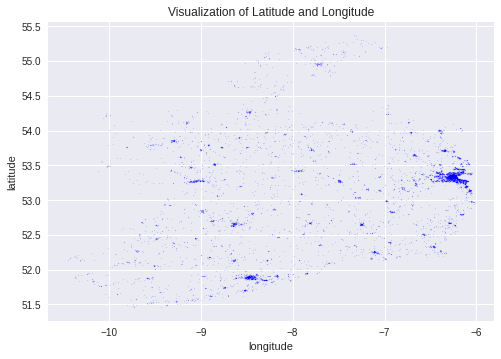

In [36]:
visualize(sale)

### Polar Coordinates

In [ ]:
# Converting Cartesian Coordinate to Polar Coordinate
# Importing math library
import math

# Reading cartesian coordinate
x = sale_data['latitude']
y = sale_data['longitude']

# Converting cartesian to polar coordinate
# Calculating radius
#radius = math.sqrt( x * x + y * y )
radius = ((x * x) + (y * y)) ** (1 / 2)
# Calculating angle (theta) in radian
theta = np.arctan(y / x)
# Converting theta from radian to degree
theta = 180 * theta / math.pi

# Displaying polar coordinates
#print('Polar coordinate is: (radius = %0.2f,theta = %0.2f)' %(radius, theta))

In [ ]:
plt.scatter(theta, radius, color='red', s=1);#alpha=0.1

### Rotational Cartesian Coordinates

In [ ]:
def rotation(df):
    rot_45_x = (0.707 * df['latitude']) + (0.707 * df['longitude'])
    rot_45_y = (0.707 * df['longitude']) + (0.707 * df['latitude'])
    rot_30_x = (0.866 * df['latitude']) + (0.5 * df['longitude'])
    rot_30_y = (0.866 * df['longitude']) + (0.5 * df['latitude'])
    return rot_45_x, rot_45_y, rot_30_x, rot_30_y

In [ ]:
rot_45_x, rot_45_y, rot_30_x, rot_30_y = rotation(sale_data)

In [ ]:
plt.scatter(rot_45_x, rot_45_y);

In [ ]:
plt.scatter(rot_30_x, rot_30_y);

### Haversine Distance

In [ ]:
def haversine_dist(lat1,lng1,lat2,lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    radius = 6371  # Earth's radius taken from google
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

### Manhattan Distance

In [ ]:
def manhattan_dist(lat1, lng1, lat2, lng2):
    '''
    calculating two haversine distances by,
     - avoiding Latitude of one point 
     - avoiding Longitude of one point
    and adding it together.
    '''
    a = haversine_dist(lat1, lng1, lat1, lng2)
    b = haversine_dist(lat1, lng1, lat2, lng1)
    return a + b

### Bearing Degree

In [ ]:
def bearing_degree(lat1, lng1, lat2, lng2):
    '''
    calculate angle between two points
    '''
    radius = 6371  # Mean radius of Earth
    diff_lng = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(diff_lng) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(diff_lng)
    return np.degrees(np.arctan2(y, x))

### Rotational Coordinates using PCA

Here, the idea is only to rotate them which would help decision tree splits in typical tree-based models.

In [ ]:
from sklearn.decomposition import PCA
def pca(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    coordinates = data[['x','y']].values
    pca_obj = PCA().fit(coordinates)
    pca_x = pca_obj.transform(data[['x', 'y']])[:,0]
    pca_y = pca_obj.transform(data[['x', 'y']])[:,1]
    return pca_x, pca_y